In [17]:
import utils
import importlib #Reload the code that has run before

utils.say_hello()

good bye


# Stats Overview
Recall: We said that instances are sampled from the "universe of instances"

In stats, we say a sample of observation comes from a population
* population = universe
* sample = dataset

Example:
* Population: all college students (nationwide)
    * Expensive in terms of time and money
* Sample: all 222 students in this class
    * Cheaper to collect. Use stats to infere from the number

Some more key stats terms:
* Parameter: any measurable characteristic about a population
    * E.g. population mean $\mu$
* Statistic: any measurable characteristic about a sample
    * E.g. sample mean $\overline{x}$
* Descriptive Stats: Stats that organize and summarize data
    * E.g. central tendency measures, data disperion measures, etc.
* Inferential stats: making inferences that go beyond the known data
    * E.g. inferring something about the population based on a sample

## Summary Stats
Summarize a data distribution into a single value or a set of values

Number of data points

In [18]:
import pandas as pd

x = [6, 8, 3, 8, 8, 7]
ser = pd.Series(x)
print(ser)
print("Number of data points:", len(ser), ser.size, ser.shape)

0    6
1    8
2    3
3    8
4    8
5    7
dtype: int64
Number of data points: 6 6 (6,)


Min and Max
* Doesn't make sense for nominal attributes

In [19]:
print("min:", ser.min(), "max:", ser.max())

min: 3 max: 8


### Central Tendency
Measure the middle value(s) in a data distribution

Mid value: $\frac{min + max}{2}$

In [20]:
print("mid value:", (ser.min() + ser.max()) / 2)

mid value: 5.5


Arithmetic mean (AKA average)
* Sensitive to outliers
* Should only be applied if you know your attribute is numeric

In [21]:
print("mean:", ser.mean())

mean: 6.666666666666667


Median: middle number in a sorted list of numbers

In [22]:
sorted_ser = ser.sort_values()
print(sorted_ser)
print("median", ser.median())

2    3
0    6
5    7
1    8
3    8
4    8
dtype: int64
median 7.5


Mode: most frequently occuring value(s)

In [23]:
print("mode:", ser.mode())

mode: 0    8
dtype: int64


### Data Dispersion (Spread)
Measure how spread out the data are

Range: Max - Min

In [24]:
print("range:", ser.max() - ser.min())

range: 5


Quantiles: roughly equal sized partitions of sorted data
* 2 quatiles: 1 data point that divides the data into 2 halves (median)
* quartiles: 3 data points that divide the data into 4 quarters
* percentile: 99 data points that divide the data into 100 groups
    * 75th percentile: the 3rd quartile
    * 50th percentile: 2nd quartile aka median
    * 25th percentile: the 1st quartile 
* IQR (interquartile range): 75th percentile  - 25th percentile

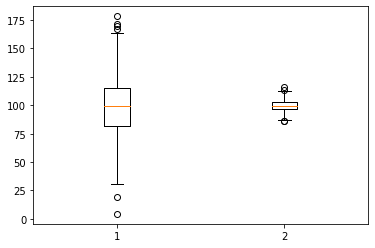

In [25]:
import numpy as np
import matplotlib.pyplot as plt

mean = 100
stdev = 25
num_samples = 1000
# random data from a normal distribution
x1 = np.random.normal(mean, stdev, num_samples)

# People love boxplot cuz it's non-parametric
# meaning this chart does not assume the data is at a specific shape
# the horizontal red line in the box is the median, not mean - only used when your data is normal
# the top and bottom (black lines) of the box represents IQR
# the top and bottom whiskers (outter most) is 1.5 * IQR
# the circles are outliers

# task: add another distribution to the plot with smaller stdev
stdev = 5
x2 = np.random.normal(mean, stdev, num_samples)

plt.boxplot([x1, x2]) # accepts a list of distributions
plt.show()

Variance: another measurement for how spread out data are from the mean
* High variance: very spread out
* Low variance: close to the mean

More commonly, people use stdev (square root of the variance), because it is in the same units as the mean

In [26]:
print("variance", ser.var())
print("stdev:", ser.std(), np.sqrt(ser.var()))

variance 3.866666666666667
stdev: 1.9663841605003503 1.9663841605003503


Histogram demo

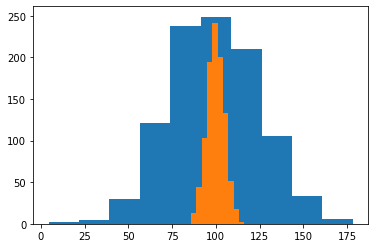

In [27]:
plt.hist(x1)
plt.hist(x2)
plt.show()

## Emperical Rule for Normal Distribution
* (about) 68% of the data lies within +/- 1 stdev
* (about) 95% of the data lies within +/- 2 stdev
* (about) 99.7% of the data lies within +/- 3 stdev

In [30]:
import importlib
import numpy as np
# task: "prove" that the emperical rule applies to x1 and x2 data
count_within_1stdev = 0
count_within_2stdev = 0
count_within_3stdev = 0

sample_mean = np.mean(x1)
sample_stdev = np.std(x1)

for value in x1:
    if sample_mean - 1 * sample_stdev <= value <= sample_mean + 1 * sample_stdev:
        count_within_1stdev += 1
    if sample_mean - 2 * sample_stdev <= value <= sample_mean + 2 * sample_stdev:
        count_within_2stdev += 1
    if sample_mean - 3 * sample_stdev <= value <= sample_mean + 3 * sample_stdev:
        count_within_3stdev += 1

print("within +/- 1:", count_within_1stdev / num_samples)
print("within +/- 2:", count_within_2stdev/ num_samples)
print("within +/- 3:", count_within_3stdev / num_samples)

within +/- 1: 0.683
within +/- 2: 0.956
within +/- 3: 0.997
